<a href="https://colab.research.google.com/github/anas1IA/NPL_research_concepts_projects/blob/main/Mini_project_NLP_for_beginer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
import pandas as pd
import re
import nltk
from nltk.corpus  import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer

## **Step 1** : cleaning data

In [257]:
text = ["This is the NLP TASKS ARTICLE written by ABhishek Jaiswal ,IN this article Ill be explaining various DATA-CLEANING techniques,So stay tuned for FURther More &&,Nah I don't think he goes to usf, he lives around"]

In [258]:

!touch file.txt
!ls
!cd file.txt

file2.txt  file3.txt  file.txt	NLP  sample_data
/bin/bash: line 1: cd: file.txt: Not a directory


In [259]:
!echo -e 'This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** \nIN this article I"ll be explaining various DATA-CLEANING techniques\nSo stay tuned for FURther More &&\nNah I don"t think he goes to usf, he lives around' > file.txt
!ls

file2.txt  file3.txt  file.txt	NLP  sample_data


In [260]:
!cat file.txt

This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** 
IN this article I"ll be explaining various DATA-CLEANING techniques
So stay tuned for FURther More &&
Nah I don"t think he goes to usf, he lives around


In [261]:
!rm txt1.txt

rm: cannot remove 'txt1.txt': No such file or directory


In [262]:
!rm -r txt

rm: cannot remove 'txt': No such file or directory


In [263]:
!touch  file2.txt

In [264]:
!mkdir NLP

mkdir: cannot create directory ‘NLP’: File exists


In [265]:
!mv file.txt NLP/


In [266]:
!mv file2.txt NLP

In [267]:
!cat NLP/file.txt

This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** 
IN this article I"ll be explaining various DATA-CLEANING techniques
So stay tuned for FURther More &&
Nah I don"t think he goes to usf, he lives around


In [268]:
!cat NLP/file2.txt

This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** 
IN this article I"ll be explaining various DATA-CLEANING techniques
So stay tuned for FURther More &&
Nah I don"t think he goes to usf, he lives around


In [269]:
!touch file3.txt
!mv file3.txt NLP/

In [270]:
!echo 'This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** ' >> file3.txt
!echo 'IN this article I"ll be explaining various DATA-CLEANING techniques' >> file3.txt
!echo 'So stay tuned for FURther More &&' >> file3.txt
!echo 'Nah I don"t think he goes to usf, he lives around' >> file3.txt
!cat file3.txt

This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** 
IN this article I"ll be explaining various DATA-CLEANING techniques
So stay tuned for FURther More &&
Nah I don"t think he goes to usf, he lives around


In [271]:
file_path = "NLP/file3.txt"

In [272]:
with open(file_path, 'r') as file:
    file_contents = file.read()

In [273]:
lines = file_contents.split('\n')

In [274]:
!echo -e 'This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** \nIN this article I"ll be explaining various DATA-CLEANING techniques\nSo stay tuned for FURther More &&\nNah I don"t think he goes to usf, he lives around' > file2.txt

In [275]:
df = pd.DataFrame({"TXT" : lines})

In [276]:
print(df)

                                                 TXT
0  This is the NLP TASKS ARTICLE written by ABhis...
1  IN this article I"ll be explaining various DAT...
2                  So stay tuned for FURther More &&
3  Nah I don"t think he goes to usf, he lives around
4                                                   


In [277]:
df['lower'] = df['TXT'].apply(lambda x: " ".join(x.lower()  for x in x.split()))

In [278]:
df

,TXT,lower
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around"
4,,


**Punctuation Removal**

In [279]:
 import string
 string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [280]:
df.lower.apply(lambda x : "".join(i for i in x if i not in string.punctuation))

0    this is the nlp tasks article written by abhis...
1    in this article ill be explaining various data...
2                      so stay tuned for further more 
3      nah i dont think he goes to usf he lives around
4                                                     
Name: lower, dtype: object

In [281]:
df['txt'] = df.TXT.apply(lambda x : "".join(re.findall(r'[a-zA-Z+" "]',x)))

In [282]:
df

,TXT,lower,txt
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...,This is the NLP TASKS ARTICLE written by ABhis...
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...","IN this article I""ll be explaining various DAT..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&,So stay tuned for FURther More
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around","Nah I don""t think he goes to usf he lives around"
4,,,


**Stop Words Removal**

In [283]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [284]:
allstopwords =  stopwords.words('english')

In [285]:
anass = 'anas nouri is very nice boy'
anass.split()

['anas', 'nouri', 'is', 'very', 'nice', 'boy']

In [286]:
df.lower.apply(lambda x : " ".join(i for  i in x.split() if i not in allstopwords))

0         nlp tasks article written abhishek jaiswal**
1    article i"ll explaining various data-cleaning ...
2                                        stay tuned &&
3               nah don"t think goes usf, lives around
4                                                     
Name: lower, dtype: object

**Spelling Correction**

In [287]:
df.lower.apply(lambda x: str(TextBlob(x).correct()))

0    this is the nap tasks article written by abhis...
1    in this article i"ll be explaining various dat...
2                    so stay tuned for further more &&
3      ah i don"t think he goes to us, he lives around
4                                                     
Name: lower, dtype: object

**Tokenization**

In [288]:
Tokenizer = "anas searches  about a intership"


In [289]:
import nltk

In [290]:
#nltk.word_tokenize(Tokenizer)
Tokenizer.split(" ")

['anas', 'searches', '', 'about', 'a', 'intership']

In [291]:
Tokenizer.split()

['anas', 'searches', 'about', 'a', 'intership']

**Stemming**

In [292]:
ste = PorterStemmer()

In [293]:
df.TXT.apply(lambda x: "  ".join([ste.stem(word)for word in x.split()]))

0    thi  is  the  nlp  task  articl  written  by  ...
1    in  thi  articl  i"ll  be  explain  variou  da...
2               so  stay  tune  for  further  more  &&
3    nah  i  don"t  think  he  goe  to  usf,  he  l...
4                                                     
Name: TXT, dtype: object

**Lemmatization** :
Lemmatize the whole dataset.

In [296]:
import textblob
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [297]:
df['lower'].apply(lambda x : " ".join([Word(word).lemmatize() for word in x.split()]))

0    this is the nlp task article written by abhish...
1    in this article i"ll be explaining various dat...
2                    so stay tuned for further more &&
3       nah i don"t think he go to usf, he life around
4                                                     
Name: lower, dtype: object

**Step 2 Exploratory Data Analysis**

*Word Frequency in Data*

In [298]:
import nltk
all_words = []
for sentence in df['lower'] :
  all_words.extend(sentence.split())
nltk.FreqDist(all_words)

FreqDist({'this': 2, 'article': 2, 'he': 2, 'is': 1, 'the': 1, 'nlp': 1, 'tasks': 1, 'written': 1, 'by': 1, 'abhishek': 1, ...})

In [299]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

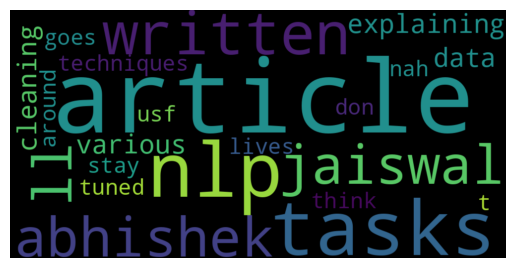

In [300]:
words = []
for message in df['lower']:
    words.extend([word for word in message.split() if word not in STOPWORDS])

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()